In [1]:
import pandas as pd
import zipfile
import os
import sys
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
# dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
vars_serg = ["estadoOrden","Ciudad","Departamento",
             "stado_producto","Marca","Pasillo","Categoria",
             "ProductoEnPromocion","cantidadVendida",
             "TotalPagado","Domicilio","PrecioFinal",
             "FechaCreaciónOrden"]

In [3]:
vars_group_b = ["FechaCreaciónOrden",
                'month_year',
                "Ciudad",
                "Departamento",
                "estadoOrden",
                "stado_producto",
                "Marca",
                "Pasillo",
                "Categoria",
                "ProductoEnPromocion"]

In [4]:
df = pd.read_csv("../Data/MERQ_CONS",
                      encoding='latin1',
                     dtype={'estadoOrden' : str,
                            'TotalPagado' : np.float64,
                            "Domicilio" : str,
                            "FechaCreaciónOrden" : str,
                            "FechaProgramaciónOrden" : str,
                            "FechadeEntregaOrden" : str,
                            "Ciudad" : str,
                            "fechacreacionProducto" : str,
                            "stado_producto" : str,
                            "Marca" : str,
                            "Departamento" : str,
                            "Pasillo" : str,
                            "Categoria" : str,
                            "ProductoEnPromocion" : np.float64,
                            "cantidadVendida" : np.float64,
                            "PrecioFinal": np.float64})

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,13,14,15,16,17,20,21,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_ts = pd.read_csv("../Data/DESCO.csv",encoding='latin1',dtype={"FechaCreaciónOrden" : str})

In [6]:
df.NombreProducto.value_counts()[:20]

Huevos A Rojo cubeta                     231182
Leche deslactosada Alpina pack x 6       163443
Leche deslactosada Alquería pack x6      130945
Pan tajado Ramo                           47176
Papel higiénico Triple hoja               46764
Azúcar blanca Riopaila bolsa              42877
Pasta spaghetti Doria                     37025
Aceite vegetal botella                    36330
Lava loza líquido botella                 32345
Azúcar morena Riopaila bolsa              28363
Crema de leche Alquería doypack           26338
Blanqueador ropa blanca botella           25615
Arroz Supremo tradicional                 23549
Toallas absorbentes Triple hoja rollo     22460
Lentejas bolsa                            21931
Sal Refisal bolsa                         21571
Salchicha Ranchera Premium                20758
Harina maíz Pan Blanco bolsa              18355
Huevos AA cubeta                          18216
Pasta cabellos de ángel Santali           18206
Name: NombreProducto, dtype: int64

In [7]:
df_ts["FechaCreaciónOrden"] = pd.to_datetime(df_ts.FechaCreaciónOrden)
df_ts.set_index("FechaCreaciónOrden",drop=False,inplace=True)

In [297]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras import callbacks

# arreglo de matriz
def create_dataset(dataset,col, look_back=1):
    return dataset.loc[:,col].values[:-2],\
            dataset.loc[:,col].shift(-1).values[:-2]

def train_test_split_sg(dataset):
    #dividir la data
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    return dataset[0:train_size], dataset[train_size:len(dataset)]

numpy.random.seed(7)

In [311]:
columns_model = list(enumerate(df_ts.iloc[:,1:].columns))

In [312]:
X_train, X_test = train_test_split_sg(X)

In [313]:
Y_train, Y_test = train_test_split_sg(Y)

In [314]:

# normalizar los datos (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(df_ts.iloc[:,1:])
dataset = df_ts.iloc[:,1:].values

In [315]:
# arreglo de matriz
def create_dataset(dataset, col, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), col]
		dataX.append(a)
		dataY.append(dataset[i + look_back, col])
	return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)

#dividir la data
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train,columns_model[0][0], look_back)
testX, testY = create_dataset(test,columns_model[0][0], look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [316]:
columns_model[0][0]

0

In [317]:
dataset

array([[ 75,  14,  55, ...,  18,  31,   8],
       [ 81,  16,  27, ...,  30,  20,  10],
       [ 86,  17,  60, ...,   2,  25,   9],
       ...,
       [ 60,   1,  84, ...,  13,  27,   0],
       [ 69,   0, 112, ...,  20,  49,   0],
       [ 56,   0,  57, ...,  13,  23,  18]])

In [319]:
# modelo 500 - 1 
call_back_ = callbacks.EarlyStopping(monitor='val_loss', 
                              min_delta=0.000000000001, 
                              patience=50, 
                              verbose=1, 
                              mode='auto', 
                              baseline=None, 
                              restore_best_weights=False)

model = Sequential()
model.add(LSTM(32,input_shape=(1, look_back),return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()
history = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=1000, 
                    batch_size=7, 
                    verbose=1,
                    callbacks=[call_back_])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_167 (LSTM)              (None, 1, 32)             4352      
_________________________________________________________________
lstm_168 (LSTM)              (None, 32)                8320      
_________________________________________________________________
dropout_102 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________
Train on 206 samples, validate on 88 samples
Epoch 1/1000
206/206 [==============================] - 37s 180ms/step - loss: 87.1355 - val_loss: 112.2446
Epoch 2/1000
206/206 [==============================] - 0s 900us/step - loss: 85.9585 - val_loss: 110.7132
Epoch 3/10

206/206 [==============================] - 0s 887us/step - loss: 35.7379 - val_loss: 57.2578
Epoch 70/1000
206/206 [==============================] - 0s 908us/step - loss: 34.6680 - val_loss: 56.7506
Epoch 71/1000
206/206 [==============================] - 0s 901us/step - loss: 32.5529 - val_loss: 56.2242
Epoch 72/1000
206/206 [==============================] - 0s 908us/step - loss: 33.3315 - val_loss: 55.7511
Epoch 73/1000
206/206 [==============================] - 0s 908us/step - loss: 32.2262 - val_loss: 55.2081
Epoch 74/1000
206/206 [==============================] - 0s 892us/step - loss: 32.0147 - val_loss: 54.7001
Epoch 75/1000
206/206 [==============================] - 0s 895us/step - loss: 30.7592 - val_loss: 54.2214
Epoch 76/1000
206/206 [==============================] - 0s 897us/step - loss: 30.7136 - val_loss: 53.7221
Epoch 77/1000
206/206 [==============================] - 0s 900us/step - loss: 32.1683 - val_loss: 53.2694
Epoch 78/1000
206/206 [============================

206/206 [==============================] - 0s 896us/step - loss: 22.4568 - val_loss: 38.5924
Epoch 146/1000
206/206 [==============================] - 0s 902us/step - loss: 24.9240 - val_loss: 38.3675
Epoch 147/1000
206/206 [==============================] - 0s 896us/step - loss: 24.8097 - val_loss: 38.1864
Epoch 148/1000
206/206 [==============================] - 0s 907us/step - loss: 22.8170 - val_loss: 38.3212
Epoch 149/1000
206/206 [==============================] - 0s 903us/step - loss: 23.9022 - val_loss: 38.2134
Epoch 150/1000
206/206 [==============================] - 0s 904us/step - loss: 24.6138 - val_loss: 37.9217
Epoch 151/1000
206/206 [==============================] - 0s 908us/step - loss: 22.5337 - val_loss: 37.7917
Epoch 152/1000
206/206 [==============================] - 0s 889us/step - loss: 23.5937 - val_loss: 37.7717
Epoch 153/1000
206/206 [==============================] - 0s 889us/step - loss: 23.2590 - val_loss: 38.4456
Epoch 154/1000
206/206 [===================

Epoch 221/1000
206/206 [==============================] - 0s 911us/step - loss: 23.9575 - val_loss: 33.0697
Epoch 222/1000
206/206 [==============================] - 0s 907us/step - loss: 23.2576 - val_loss: 33.2858
Epoch 223/1000
206/206 [==============================] - 0s 908us/step - loss: 22.7039 - val_loss: 33.3198
Epoch 224/1000
206/206 [==============================] - 0s 916us/step - loss: 21.5932 - val_loss: 34.4563
Epoch 225/1000
206/206 [==============================] - 0s 909us/step - loss: 23.4537 - val_loss: 33.1173
Epoch 226/1000
206/206 [==============================] - 0s 913us/step - loss: 22.5531 - val_loss: 32.8267
Epoch 227/1000
206/206 [==============================] - 0s 891us/step - loss: 23.2112 - val_loss: 32.8773
Epoch 228/1000
206/206 [==============================] - 0s 927us/step - loss: 24.2750 - val_loss: 33.4981
Epoch 229/1000
206/206 [==============================] - 0s 912us/step - loss: 23.4850 - val_loss: 33.6906
Epoch 230/1000
206/206 [====

Epoch 297/1000
206/206 [==============================] - 0s 888us/step - loss: 22.6509 - val_loss: 32.2813
Epoch 298/1000
206/206 [==============================] - 0s 899us/step - loss: 23.7879 - val_loss: 31.7958
Epoch 299/1000
206/206 [==============================] - 0s 894us/step - loss: 21.3557 - val_loss: 30.6529
Epoch 300/1000
206/206 [==============================] - 0s 885us/step - loss: 22.8758 - val_loss: 31.2108
Epoch 301/1000
206/206 [==============================] - 0s 895us/step - loss: 21.5633 - val_loss: 32.4939
Epoch 302/1000
206/206 [==============================] - 0s 902us/step - loss: 23.7960 - val_loss: 31.0280
Epoch 303/1000
206/206 [==============================] - 0s 890us/step - loss: 24.2093 - val_loss: 30.7262
Epoch 304/1000
206/206 [==============================] - 0s 882us/step - loss: 22.5943 - val_loss: 30.4910
Epoch 305/1000
206/206 [==============================] - 0s 884us/step - loss: 23.1806 - val_loss: 30.6081
Epoch 306/1000
206/206 [====

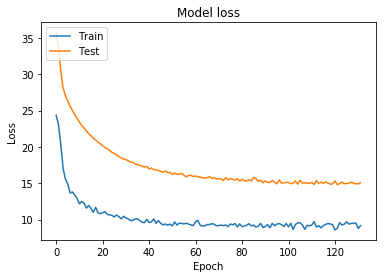

In [273]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [237]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

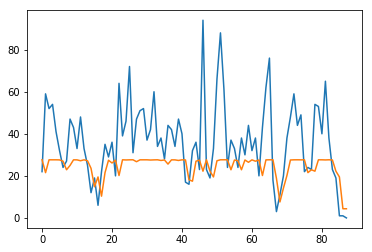

In [241]:
# predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.plot(testY)
plt.plot(testPredict)

In [187]:
# predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# # invertir la normalizacion
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])


# #calcular el rsme
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))


# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

In [373]:
serie_h = df[df.NombreProducto=="Huevos A Rojo cubeta"][["FechaCreaciónOrden","cantidadVendida"]]
serie_h["FechaCreaciónOrden"] = pd.to_datetime(serie_h.FechaCreaciónOrden)
serie_h.set_index("FechaCreaciónOrden",inplace=True)

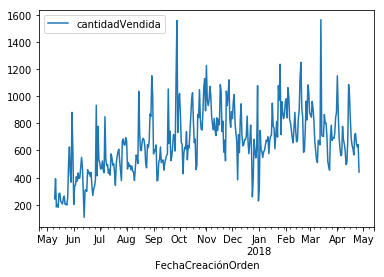

In [370]:
serie_h.resample("D").sum().copy().plot()

In [374]:
num_feat = 1
serie_s = df_ts.iloc[:,2].copy()
serie = df_ts.iloc[:,2].copy()

for i in range(num_feat):
    serie = pd.concat([serie,serie_s.shift(-(i+1))],axis=1) 
serie.dropna(inplace=True)

In [375]:

numpy.random.seed(7)

#dividir la data
train_size = int(len(serie) * 0.7)
test_size = len(serie) - train_size
train, test = serie.iloc[0:train_size,:], serie.iloc[train_size:len(dataset),:]

trainX, trainY = train.iloc[:,:-1].values, train.iloc[:,-1].values
testX, testY = test.iloc[:,:-1].values, test.iloc[:,-1].values

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [376]:
testY.shape

(90,)

In [360]:
# modelo 500 - 1 
# # model.add(Dropout(0.5))
# model.add(LSTM(32))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation="relu"))
# model.compile(loss='mean_absolute_error', optimizer='adam')
# history = model.fit(trainX, trainY, 
#                     validation_data=(testX, testY), 
#                     epochs=1000, 
#                     batch_size=15, 
#                     verbose=1,
#                     callbacks=[call_back_])

# modelo 500 - 1 
model = Sequential()
model.add(LSTM(500))
model.add(Dropout(0.7))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()
history = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=1000, 
                    batch_size=30, 
                    verbose=1,
                    callbacks=[call_back_])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_189 (LSTM)              (None, 1, 256)            270336    
_________________________________________________________________
lstm_190 (LSTM)              (None, 500)               1514000   
_________________________________________________________________
dropout_110 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 501       
Total params: 1,784,837
Trainable params: 1,784,837
Non-trainable params: 0
_________________________________________________________________
Train on 241 samples, validate on 57 samples
Epoch 1/1000
241/241 [==============================] - 47s 194ms/step - loss: 598.6383 - val_loss: 770.2325
Epoch 2/1000
241/241 [==============================] - 2s 8ms/step - loss: 550.7135 - val_loss: 733.6514
Epoc

241/241 [==============================] - 2s 8ms/step - loss: 183.8109 - val_loss: 234.3050
Epoch 70/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.8276 - val_loss: 234.3873
Epoch 71/1000
241/241 [==============================] - 2s 8ms/step - loss: 184.2269 - val_loss: 234.2647
Epoch 72/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.8380 - val_loss: 234.2189
Epoch 73/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.8520 - val_loss: 233.9969
Epoch 74/1000
241/241 [==============================] - 2s 8ms/step - loss: 180.0309 - val_loss: 231.5884
Epoch 75/1000
241/241 [==============================] - 2s 8ms/step - loss: 179.1337 - val_loss: 230.6695
Epoch 76/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.0113 - val_loss: 230.6174
Epoch 77/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.4391 - val_loss: 232.9206
Epoch 78/1000
241/241 [============================

KeyboardInterrupt: 

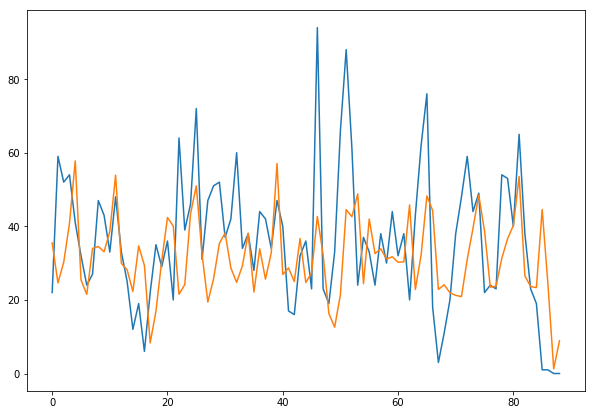

In [345]:
# predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.figure(figsize=(10,7))
plt.plot(testY)
plt.plot(testPredict)

In [40]:
metrics.median_absolute_error(testPredict,testY)

11.698018074035645